<a href="https://colab.research.google.com/github/demirhankoc/custom_sales/blob/main/holocrowdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
veri = pd.read_csv("Holocrow_database-Kopya.csv")

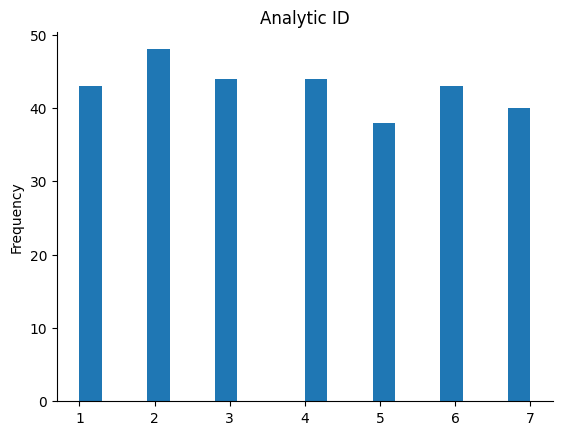

In [ ]:
from matplotlib import pyplot as plt
veri['Analytic ID'].plot(kind='hist', bins=20, title='Analytic ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
en_cok_tekrarlanan_bolgeler = veri['Regiones'].value_counts()
print(en_cok_tekrarlanan_bolgeler)

Kars             9
Karaman          8
Hakkari          7
Antalya          7
Kırklareli       7
                ..
Siirt            1
Kilis            1
İzmir            1
Hatay            1
Kahramanmaraş    1
Name: Regiones, Length: 80, dtype: int64


In [ ]:
turkiye_haritasi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-27-c12775462ef2>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  turkiye_haritasi = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
turkiye_haritasi_filtered = turkiye_haritasi[turkiye_haritasi['name'].isin(en_cok_tekrarlanan_bolgeler)]


In [ ]:
turkiye_haritasi_filtered.empty

True

In [ ]:
print(turkiye_haritasi_filtered.head())

Empty GeoDataFrame
Columns: [pop_est, continent, name, iso_a3, gdp_md_est, geometry]
Index: []


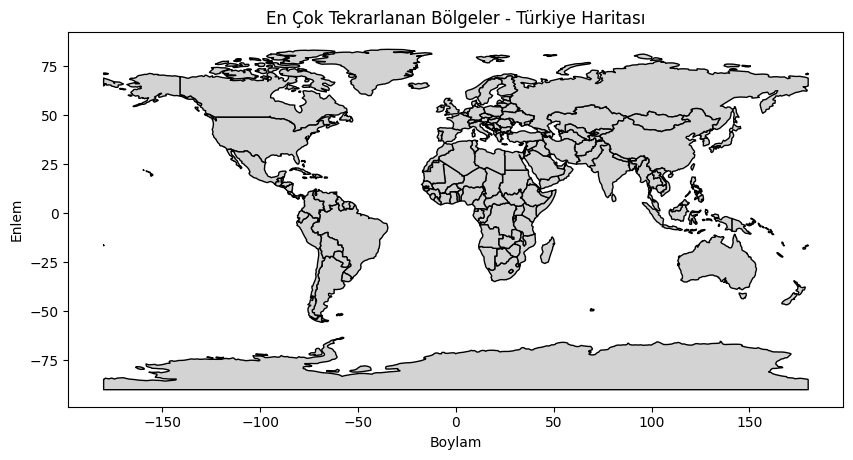

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
turkiye_haritasi.plot(ax=ax, color='lightgrey', edgecolor='black')

plt.title('En Çok Tekrarlanan Bölgeler - Türkiye Haritası')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.show()

In [ ]:
tarih_frekans = veri['Starting Date'].value_counts()


In [ ]:
satis_gun_frekans = tarih_frekans.head(10)
print(satis_gun_frekans)


2/27/2023     3
2/15/2024     3
1/14/2024     3
11/8/2023     3
1/15/2024     3
11/24/2023    3
6/7/2023      3
8/12/2023     3
5/23/2023     3
4/6/2023      3
Name: Starting Date, dtype: int64


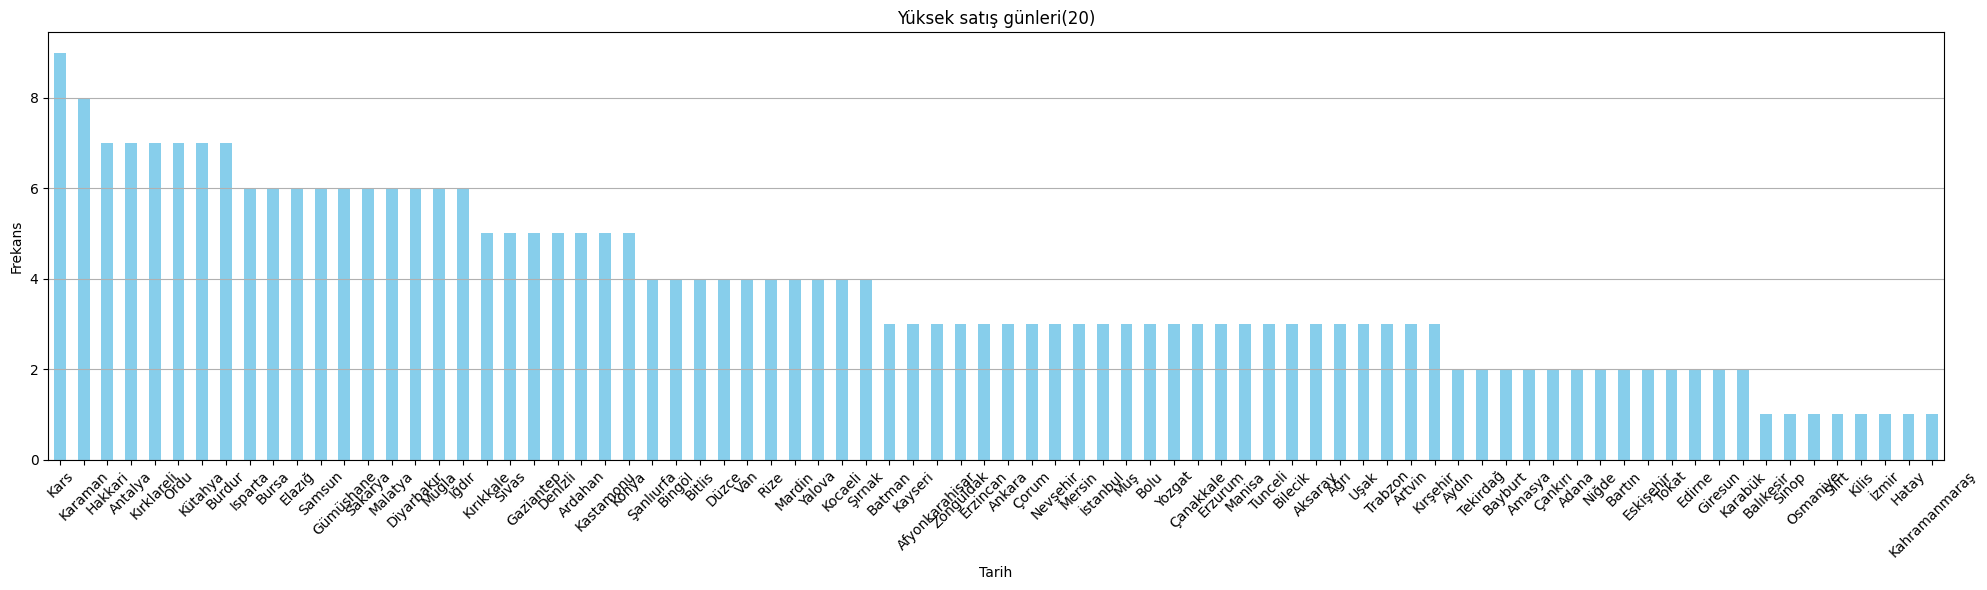

In [ ]:
plt.figure(figsize=(20, 6))
en_cok_tekrarlanan_bolgeler.plot(kind='bar', color='skyblue')
plt.title('Yüksek satış günleri(20)')
plt.xlabel('Tarih')
plt.ylabel('Frekans')
plt.xticks(rotation=45)  # x eksenindeki tarihleri 45 derece döndür
plt.grid(axis='y')  # y ekseninde ızgaraları göster
plt.tight_layout()  # grafik öğeleri arasındaki boşlukları ayarla
plt.show()